# (1) Train predicator (classifier) for AFA 
The AFA problem contains the training of a classifier that is able to predict well based on any acquired subset of features. 
In this notebook we train and save such a classifier 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

Paths for data

In [2]:
from afa.configurations.utils_static import specify_default_paths_static
# which dataset to work on 
dataset_name   = "synthetic_1"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# automatically specify some path locations (change paths manually if needed) 
paths = specify_default_paths_static(dataset_name = dataset_name , miss_scenario = miss_scenario) 

Paths for model

In [3]:
# name for predictor 
predictor_model_name  = 'logistic_regression'

# new (where to save the model) 
predictor_model_dir = paths['data_dir'] + 'predictor_models' + '/' + predictor_model_name + '/'

# reporting
explanation_file = predictor_model_dir +  'reports/' + 'model_report' 

## Load dataset with missingness 
At first, we want to load the dataset 

Includes loading: 
- superfeature mapping
- problem
- afa_problem 
- missingness_model

In [4]:
from afa.data_modelling.datasets.data_loader.data_loader_static import DataLoader_static

2023-02-17 17:41:39.960854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 17:41:40.108071: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 17:41:40.108087: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-17 17:41:40.669654: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
data_loader = DataLoader_static( data_file                  = paths['data_file'],
                                 superfeature_mapping_file  = paths['superfeature_mapping_file'],
                                 problem_file               = paths['problem_file'],
                                 afa_problem_files          = paths['afa_problem_files'], 
                                 miss_model_files           = paths['miss_model_files'], 
                                 folds_file                 = paths['folds_file'] )
dataset = data_loader.load() 

## Create afa dataset with missingness 
To train an AFA predictor, we need to induce artificial missingness (such that the predictor is robust to the missingness pattern). 
Here, we use a simple model to create missingness randomly (MCAR).

In [6]:
from afa.afa_datasets.utils_static import create_MCAR_afa_dataset_static

In [7]:
afa_dataset = create_MCAR_afa_dataset_static( dataset, MCAR_ratio = 0.9, n_samples = 5)

Change base_model to constant
Change base_model to constant
Set weight for constant model ...
Set weight for constant model ...


## Train Predictor 

### Initialize predictor 

In [8]:
from afa.afa_models.afa_predictors.afa_predictor_static import AFAPredictor_static

In [9]:
predictor_model_params = {
    'name' : predictor_model_name, 
    'directory': predictor_model_dir,
    'base_model_params' : {   
        'model_type': 'ImputeThenRegress',
        'imputer_params' : {
              'model_type': 'simple_imputer',
              'mode' : 'imputation', 
            },
        'predictor_params' : {
              'model_type': 'ann',
              'mode' : dataset.problem, 
              'units':              1,
              'layers': 1,
              'learning_rate': 0.01,
              'batch_size' :128,
              'epochs': 100
          }
    }
}

In [10]:
afa_predictor = AFAPredictor_static(    name            = predictor_model_params['name'], 
                                        model_params    = predictor_model_params, 
                                        directory       = predictor_model_params['directory'])   

2023-02-17 17:41:44.551301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-17 17:41:44.551462: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 17:41:44.551506: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-17 17:41:44.551545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-17 17:41:44.551584: W tensorf

Epoch 1/100


2023-02-17 17:41:44.994587: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-02-17 17:41:44.994639: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-02-17 17:41:44.995573: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-02-17 17:41:44.995861: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2023-02-17 17:41:44.996038: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so'; dlerror: libcupti.so: cannot open shared object file: No such file or directory
2023-02-17 17:41:44.996103: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: error 999: 
2023-02-17 17:41:44.996124: E tensorflow/core/profiler/backends/

1/1 [==============================] - 1s 613ms/step - loss: 1.7218 - binary_accuracy: 0.1481 - val_loss: 1.1164 - val_binary_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 1.7064 - binary_accuracy: 0.1667 - val_loss: 1.1076 - val_binary_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 1.6911 - binary_accuracy: 0.1667 - val_loss: 1.0989 - val_binary_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 1.6758 - binary_accuracy: 0.1667 - val_loss: 1.0903 - val_binary_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 1.6606 - binary_accuracy: 0.1852 - val_loss: 1.0819 - val_binary_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 1.6455 - binary_accuracy: 0.2037 - val_loss: 1.0735 - val_binary_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 1.6304 - binary

2023-02-17 17:41:46.426880: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-02-17 17:41:46.426911: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-02-17 17:41:46.426954: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-02-17 17:41:46.426963: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:184] cuptiSubscribe: ignored due to a previous error.
2023-02-17 17:41:46.426966: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-02-17 17:41:46.426969: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1715] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


1/1 [==============================] - 0s 28ms/step - loss: 1.4016 - binary_accuracy: 0.2407 - val_loss: 0.9695 - val_binary_accuracy: 0.3333
Epoch 24/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3880 - binary_accuracy: 0.2407 - val_loss: 0.9664 - val_binary_accuracy: 0.3333
Epoch 25/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3745 - binary_accuracy: 0.2407 - val_loss: 0.9636 - val_binary_accuracy: 0.3333
Epoch 26/100
1/1 [==============================] - 0s 27ms/step - loss: 1.3611 - binary_accuracy: 0.2593 - val_loss: 0.9611 - val_binary_accuracy: 0.3333
Epoch 27/100
1/1 [==============================] - 0s 27ms/step - loss: 1.3477 - binary_accuracy: 0.2593 - val_loss: 0.9588 - val_binary_accuracy: 0.3333
Epoch 28/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3345 - binary_accuracy: 0.2593 - val_loss: 0.9567 - val_binary_accuracy: 0.3333
Epoch 29/100
1/1 [==============================] - 0s 27ms/step - loss: 1.3213 - b

2023-02-17 17:41:47.216889: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-02-17 17:41:47.217505: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:140] cuptiFinalize: ignored due to a previous error.
2023-02-17 17:41:47.217530: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-02-17 17:41:47.217537: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1807] function cupti_interface_->Finalize()failed with error 
2023-02-17 17:41:47.235432: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-02-17 17:41:47.235481: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:133] cuptiGetTimestamp: ignored due to a previous error.
2023-02-17 17:41:47.235489: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:522]  GpuTracer has collected 0 callback api events and 0 a

1/1 [==============================] - 0s 29ms/step - loss: 1.1708 - binary_accuracy: 0.2778 - val_loss: 0.9385 - val_binary_accuracy: 0.3333
Epoch 42/100
1/1 [==============================] - 0s 31ms/step - loss: 1.1589 - binary_accuracy: 0.2778 - val_loss: 0.9370 - val_binary_accuracy: 0.3333
Epoch 43/100
1/1 [==============================] - 0s 28ms/step - loss: 1.1471 - binary_accuracy: 0.2778 - val_loss: 0.9355 - val_binary_accuracy: 0.3333
Epoch 44/100
1/1 [==============================] - 0s 27ms/step - loss: 1.1355 - binary_accuracy: 0.2778 - val_loss: 0.9339 - val_binary_accuracy: 0.3333
Epoch 45/100
1/1 [==============================] - 0s 32ms/step - loss: 1.1240 - binary_accuracy: 0.2778 - val_loss: 0.9321 - val_binary_accuracy: 0.3333
Epoch 46/100
1/1 [==============================] - 0s 35ms/step - loss: 1.1125 - binary_accuracy: 0.2778 - val_loss: 0.9302 - val_binary_accuracy: 0.3333
Epoch 47/100
1/1 [==============================] - 0s 32ms/step - loss: 1.1013 - b

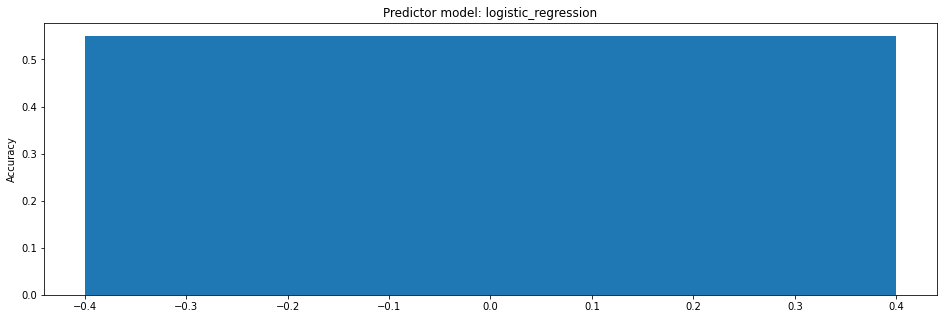

In [11]:
afa_predictor.fit(afa_dataset, 
                  fold = 0, 
                  train_split = 'train', 
                  valid_split = 'val', 
                  fit_again = False)

In [12]:
label_pred = afa_predictor.predict( afa_dataset, fold = 0, split = 'val', n_samples = 1 )

1/1 [==============================] - 0s 14ms/step


In [13]:
label_pred.shape

(20, 1)

### Write report

In [17]:
explanation_file = afa_predictor.directory + 'model_report.md'  # +  'reports/' + 'model_report' 
afa_predictor.explain(file= explanation_file, format = 'markdown')